In [1]:
# Importing LIbraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Fill Missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

/var/folders/fy/w02yc3s154v8n0_svnfxs5hm0000gn/T/ipykernel_42452/826652468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/fy/w02yc3s154v8n0_svnfxs5hm0000gn/T/ipykernel_42452/826652468.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [4]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Age binning
def age_category(age):
    if age < 18:
        return '<18'
    elif age < 40:
        return '18-40'
    elif age < 60:
        return '40-60'
    else:
        return '60+'
    
df['AgeBin'] = df['Age'].apply(age_category)

In [7]:
# Calcualte family size
df['FamilySize'] = df['SibSp'] + df['Parch']

In [8]:
# Map Embarked column
embarked_map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
df['Embarked'] = df['Embarked'].map(embarked_map)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,18-40,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,40-60,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,60+,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,18-40,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,18-40,2


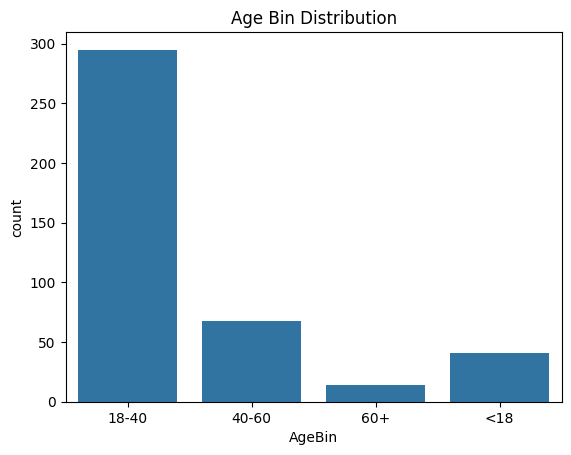

In [10]:
# Data Visualization
#1. Age group visualization
sb.countplot(data=df, x='AgeBin')
plt.title('Age Bin Distribution')
plt. show()

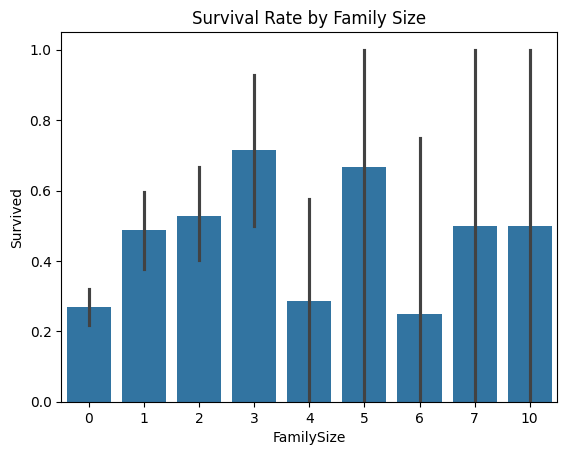

In [11]:
# Survival Rate by Family Size
sb.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.show()